poisson equation in 2 d using the finite method
Name: Dzekwer Kingsley Laweh
Index No: 3502222
U_{yy} + U_{xx} = f(x,y)
let U be phi and f(x, y) be 100(x^2 + y^2)
u(x, 0), u(x, 1) = sin2*pi*x
u(0, y), u(1, y) = 2sin2*pi*y

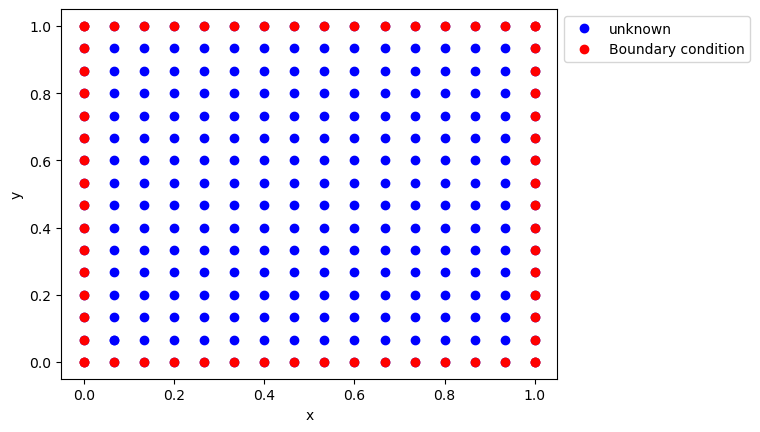

<function matplotlib.pyplot.show(close=None, block=None)>

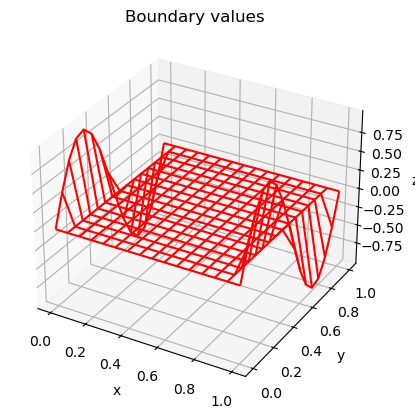

In [6]:
import numpy as np
import matplotlib.pyplot as plt
N = 15
h=1/N
x = np.arange(0, 1.0001, h)
y= np.arange(0, 1.0001, h)
X, Y = np.meshgrid(x, y)
plt.plot(x[1], y[1], "bo", label ="unknown")
plt.plot(X, Y, "bo")
plt.plot(np.zeros(N+1), y, "ro", label= "Boundary condition")
plt.plot(np.ones(N+1), y, "ro")
plt.plot(x, np.zeros(N+1), "ro")
plt.plot(x, np.ones(N+1), "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor = (1, 1))
plt.show()
w = np.zeros((N+1, N+1))
for i in range (0, N):
    w[i, 0] = np.sin(2*np.pi*x[i])
    w[i, N] = np.sin(2*np.pi*x[i])
for j in range (0, N):
    w[j, 0] = np.sin(2*np.pi*y[j])
    w[j, N] = np.sin(2*np.pi*y[j])
fig = plt.figure()
ax = fig.add_subplot(111, projection= "3d")
ax.plot_wireframe(X, Y, w, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Boundary values")
plt.show


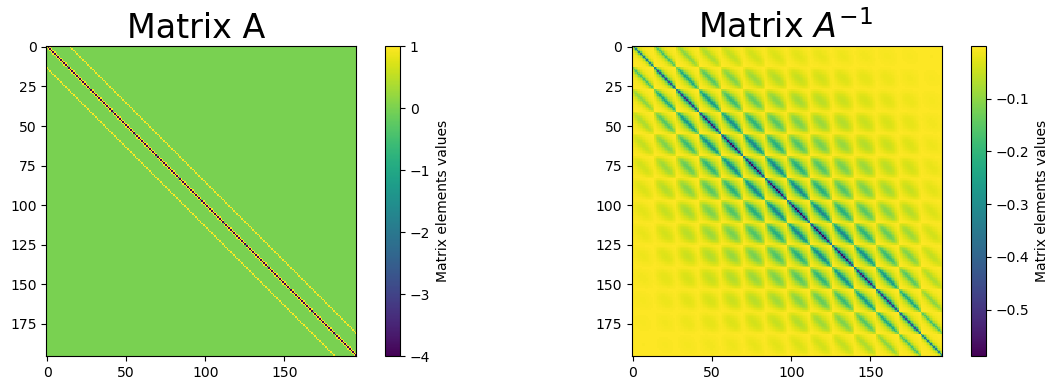

In [7]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j]=-4

# LOWER DIAGONAL        
for i in range (1,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j-1]=1   
# UPPPER DIAGONAL        
for i in range (0,N-2):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j+1]=1   

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):           
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1        
        
        
# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):           
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show();

In [8]:
r=np.zeros(N2)

# vector r      
for i in range (0,N-1):
    for j in range (0,N-1):           
        r[i+(N-1)*j]=100*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])     
# Boundary        
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary
      
b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary
    
b=b_left_right+b_bottom_top

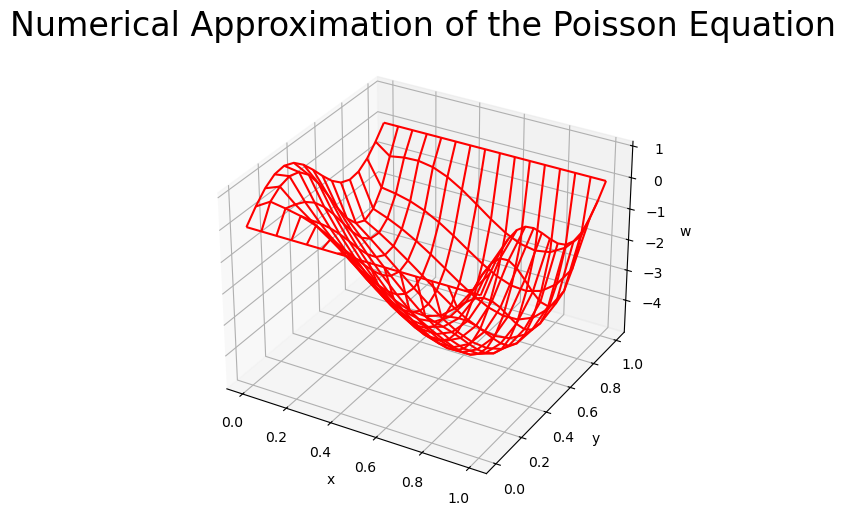

In [9]:
C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
plt.show();